In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [19]:
ratings_matched  = pd.read_csv('DATA/matched_beer_data/ratings.csv',sep = ',', low_memory= False, skiprows=1)

In [20]:
ratings_matched.head()

,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,...,brewery_name.1,date.1,overall.1,palate.1,rating.1,style.1,taste.1,text.1,user_id.1,user_name.1
0,11.3,4.5,4.5,645,Trappistes Rochefort 10,207,Brasserie de Rochefort,1324810800,5.0,4.5,...,Brasserie Rochefort,1387710000,19.0,4.0,4.6,Abt/Quadrupel,9.0,a) Geruch malzig-schwer-sÃ¼Ã. Riecht schon ...,83106,Erzengel
1,5.0,NaN,NaN,28191,Myanmar Lager Beer,9369,Myanmar Brewery and Distillery,1322650800,NaN,NaN,...,Myanmar Brewery and Distillery,1322564400,6.0,2.0,1.7,Pale Lager,4.0,"Can. Weak and watery, not the best beer of the...",91324,visionthing
2,5.0,3.5,3.5,57911,Cantillon Tyrnilambic Baie D’Argousier Lambic,388,Brasserie Cantillon,1344074400,4.0,4.0,...,Cantillon,1353582000,17.0,4.0,4.1,Lambic Style - Fruit,8.0,"Bottle @ One Pint Pub, Helsinki. Originally ra...",98624,tiong
3,5.0,4.0,3.5,57913,Cantillon Pikkulinnun Viskilambic,388,Brasserie Cantillon,1344074400,4.0,4.0,...,Cantillon,1416222000,16.0,4.0,4.1,Lambic Style - Unblended,9.0,"Draught @Â Pikkulintu, Helsinki, Finland. A pr...",98624,tiong
4,6.0,4.0,4.0,81125,Drie Fonteinen Oude Geuze - Armand & Tommy,2216,Brouwerij 3 Fonteinen,1346234400,4.0,4.0,...,Brouwerij 3 Fonteinen,1345284000,16.0,4.0,4.0,Lambic Style - Gueuze,8.0,750ml bottleBottling date: 2011/02/17 - Pours ...,98624,tiong


In [21]:
print(ratings_matched.columns)

Index(['abv', 'appearance', 'aroma', 'beer_id', 'beer_name', 'brewery_id',
       'brewery_name', 'date', 'overall', 'palate', 'rating', 'review',
       'style', 'taste', 'text', 'user_id', 'user_name', 'abv.1',
       'appearance.1', 'aroma.1', 'beer_id.1', 'beer_name.1', 'brewery_id.1',
       'brewery_name.1', 'date.1', 'overall.1', 'palate.1', 'rating.1',
       'style.1', 'taste.1', 'text.1', 'user_id.1', 'user_name.1'],
      dtype='object')


In [101]:
nb_ratings_per_user = ratings_matched['user_name'].value_counts().to_frame()

In [98]:
mean_nb_ratings_per_user = nb_ratings_per_user.mean()
std_nb_ratings_per_user = nb_ratings_per_user.std()
nb_ratings_per_user = (nb_ratings_per_user -mean_nb_ratings_per_user)/std_nb_ratings_per_user

In [99]:
np.percentile(nb_ratings_per_user,50)
nb_ratings_per_user_0_50 = nb_ratings_per_user.loc[nb_ratings_per_user['user_name'] <= np.percentile(nb_ratings_per_user,75)]
nb_ratings_per_user_75_end = nb_ratings_per_user.loc[nb_ratings_per_user['user_name'] > np.percentile(nb_ratings_per_user,75)]


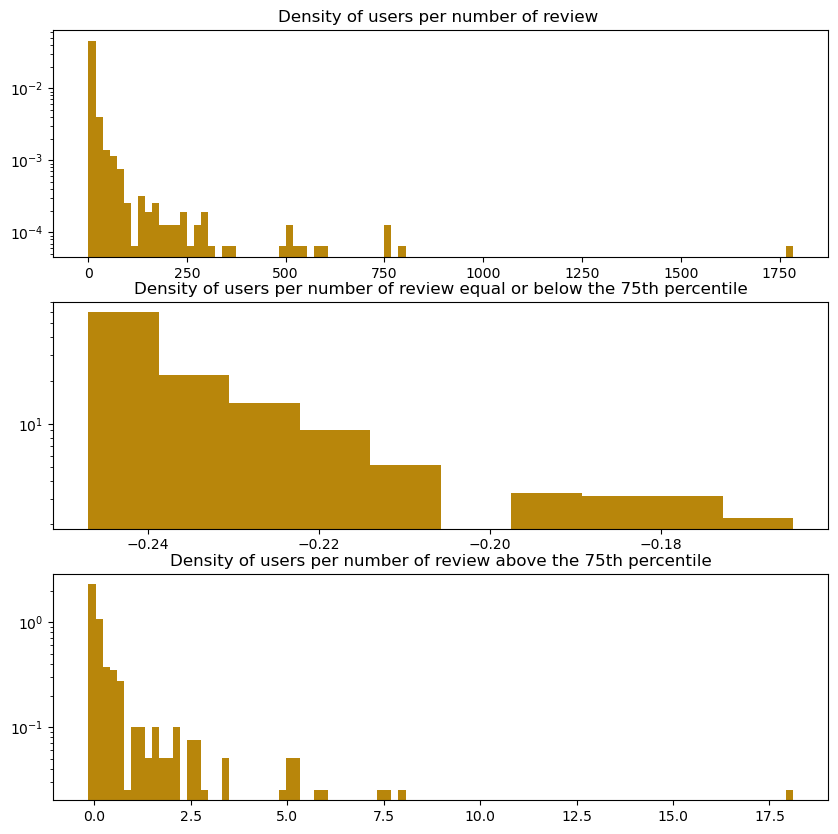

In [110]:
fig, ax = plt.subplots(nrows= 3,figsize=(10,10))

ax[0].hist(nb_ratings_per_user, bins=100,color = 'darkgoldenrod', density=True, histtype='bar',log= True )
ax[0].set_title('Density of users per number of review ')
ax[1].hist(nb_ratings_per_user_0_50, bins=10,color = 'darkgoldenrod', density=True, histtype='bar',log= True )
ax[1].set_title('Density of users per number of review equal or below the 75th percentile')
ax[2].hist(nb_ratings_per_user_75_end, bins=100,color = 'darkgoldenrod', density=True, histtype='bar',log= True )
ax[2].set_title('Density of users per number of review above the 75th percentile')
plt.show()
